In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

C:\Users\jason\AppData\Local\Temp\ipykernel_16512\2375269354.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
start = "2019-04-05"
end = "2024-04-05"

aapl = yf.download("AAPL", start, end)
samsung = yf.download("005930.KS", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#### Data Preview

In [4]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412914,74106400
2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159012,103526800
2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014603,143072800
2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284153,86781200
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882244,83603200
...,...,...,...,...,...,...
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500


In [5]:
samsung


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,46950.0,47550.0,46600.0,46850.0,41157.734375,8546339
2019-04-08,47250.0,47250.0,46150.0,46650.0,40982.039062,8507909
2019-04-09,46700.0,46950.0,46200.0,46650.0,40982.039062,6878761
2019-04-10,46400.0,46700.0,46050.0,46700.0,41025.957031,11883995
2019-04-11,46700.0,46800.0,46150.0,46250.0,40630.640625,13697399
...,...,...,...,...,...,...
2024-03-29,81200.0,82500.0,80900.0,82400.0,82400.000000,27126366
2024-04-01,83200.0,83300.0,82000.0,82000.0,82000.000000,20116513
2024-04-02,82900.0,85000.0,82900.0,85000.0,85000.000000,37077944


### Apple Data Cleaning/Preprocessing

In [6]:
aapl.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
aapl.shape

(1258, 6)

In [8]:
# Handling outliers in the Close Column

z_scores = (aapl['Close'] - aapl['Close'].mean()) / aapl['Close'].std()

outliers = z_scores.abs() > 3

aapl = aapl[~outliers]

aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412914,74106400
2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159012,103526800
2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014603,143072800
2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284153,86781200
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882244,83603200
...,...,...,...,...,...,...
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500


In [9]:
aapl.shape

(1258, 6)

In [10]:
# Checking aapl consistency in column headers and aapl types
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


### Samsung Data Cleaning/Preprocessing

In [11]:
samsung.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
samsung.shape

(1233, 6)

In [13]:
# Handling outliers in the Close Column

z_scores = (samsung['Close'] - samsung['Close'].mean()) / samsung['Close'].std()

outliers = z_scores.abs() > 3

samsung = samsung[~outliers]

samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,46950.0,47550.0,46600.0,46850.0,41157.734375,8546339
2019-04-08,47250.0,47250.0,46150.0,46650.0,40982.039062,8507909
2019-04-09,46700.0,46950.0,46200.0,46650.0,40982.039062,6878761
2019-04-10,46400.0,46700.0,46050.0,46700.0,41025.957031,11883995
2019-04-11,46700.0,46800.0,46150.0,46250.0,40630.640625,13697399
...,...,...,...,...,...,...
2024-03-29,81200.0,82500.0,80900.0,82400.0,82400.000000,27126366
2024-04-01,83200.0,83300.0,82000.0,82000.0,82000.000000,20116513
2024-04-02,82900.0,85000.0,82900.0,85000.0,85000.000000,37077944


In [14]:
samsung.shape

(1233, 6)

In [15]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1233 non-null   float64
 1   High       1233 non-null   float64
 2   Low        1233 non-null   float64
 3   Close      1233 non-null   float64
 4   Adj Close  1233 non-null   float64
 5   Volume     1233 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.4 KB


In [16]:
samsung.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,46950.0,47550.0,46600.0,46850.0,41157.734375,8546339
2019-04-08,47250.0,47250.0,46150.0,46650.0,40982.039062,8507909
2019-04-09,46700.0,46950.0,46200.0,46650.0,40982.039062,6878761
2019-04-10,46400.0,46700.0,46050.0,46700.0,41025.957031,11883995
2019-04-11,46700.0,46800.0,46150.0,46250.0,40630.640625,13697399


In [17]:
# Converting KRW to USD for Samsung Stock

samsung['Open'] = samsung['Open'] * (0.00074)
samsung['High'] = samsung['High'] * (0.00074)
samsung['Low'] = samsung['Low'] * (0.00074)
samsung['Close'] = samsung['Close'] * (0.00074)
samsung['Adj Close'] = samsung['Adj Close'] * (0.00074)

samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,34.743,35.187,34.484,34.669,30.456723,8546339
2019-04-08,34.965,34.965,34.151,34.521,30.326709,8507909
2019-04-09,34.558,34.743,34.188,34.521,30.326709,6878761
2019-04-10,34.336,34.558,34.077,34.558,30.359208,11883995
2019-04-11,34.558,34.632,34.151,34.225,30.066674,13697399
...,...,...,...,...,...,...
2024-03-29,60.088,61.050,59.866,60.976,60.976000,27126366
2024-04-01,61.568,61.642,60.680,60.680,60.680000,20116513
2024-04-02,61.346,62.900,61.346,62.900,62.900000,37077944


## Exploratory Data Analysis

In [18]:
# Describe numerical data for Apple & Samsung stock

samsung.describe()
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,130.054187,131.518893,128.689183,130.175395,128.638817,9.825188e+07
std,44.235810,44.580063,43.874981,44.242189,44.571391,5.199738e+07
min,43.860001,44.480000,42.567501,43.325001,41.869549,2.404830e+07
25%,92.096876,93.307501,91.235626,92.672499,90.628124,6.482710e+07
50%,141.724998,143.394997,139.474998,141.955002,140.226295,8.492310e+07
75%,166.565006,168.672504,165.092499,166.372498,164.869976,1.151837e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.265100e+08


In [19]:
aapl.info()
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1233 non-null   float64
 1   High       1233 non-null   float64
 2   Low        1233 non-null   float64
 3   Close      1233 non-null   float64
 4   Adj Close  1233 non-null   float64
 5   Volume     1233 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.4 KB


Volume of Stocks Traded 

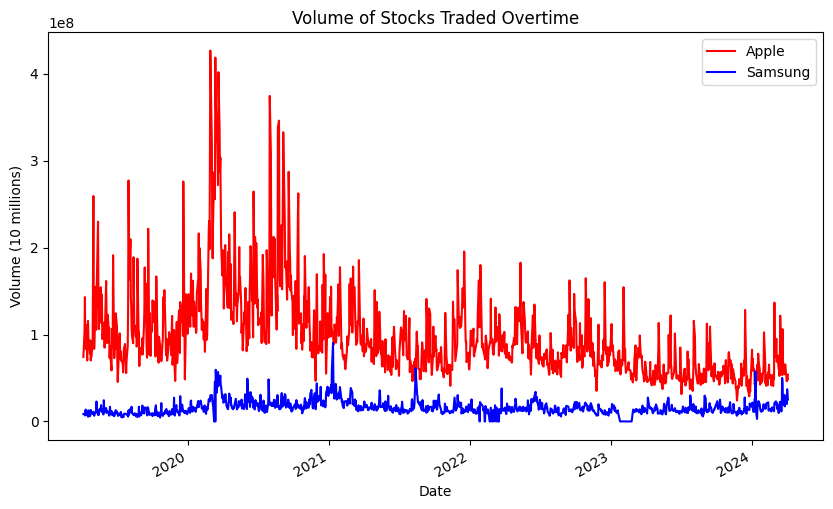

In [20]:
plt.figure(figsize=(10,6))
aapl['Volume'].plot(label='Apple', color='red')
samsung['Volume'].plot(label='Samsung', color='blue')
plt.ylabel('Volume (10 millions)')
plt.legend()
plt.title('Volume of Stocks Traded Overtime')
plt.show()

Low Stocks Traded Overtime

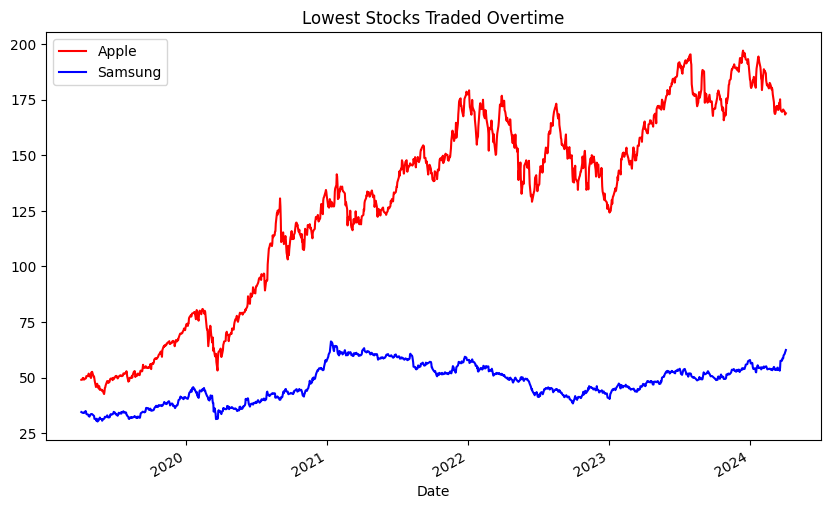

In [21]:
plt.figure(figsize=(10,6))
aapl['Low'].plot(label='Apple', color='red')
samsung['Low'].plot(label='Samsung', color='blue')
plt.legend()
plt.title('Lowest Stocks Traded Overtime')
plt.show()

Highest Stocks Traded Overtime

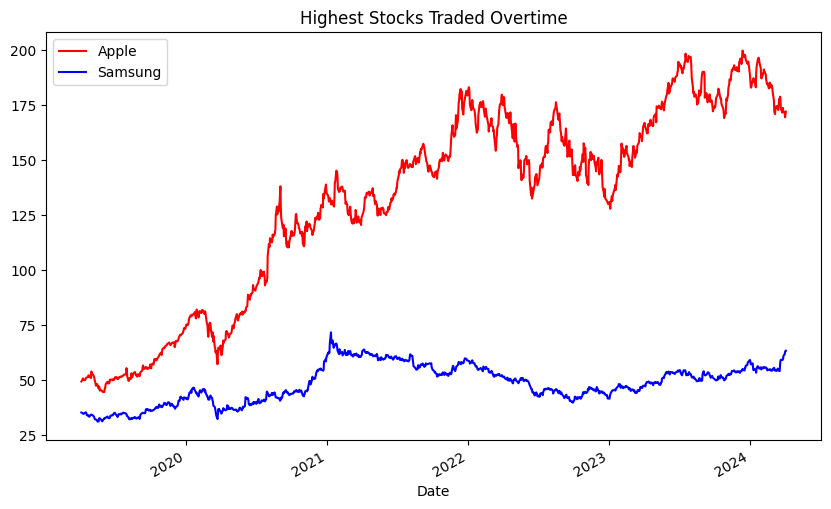

In [22]:
plt.figure(figsize=(10,6))
aapl['High'].plot(label='Apple', color='red')
samsung['High'].plot(label='Samsung', color='blue')
plt.legend()
plt.title('Highest Stocks Traded Overtime')
plt.show()

  Plotting Closing Time Series

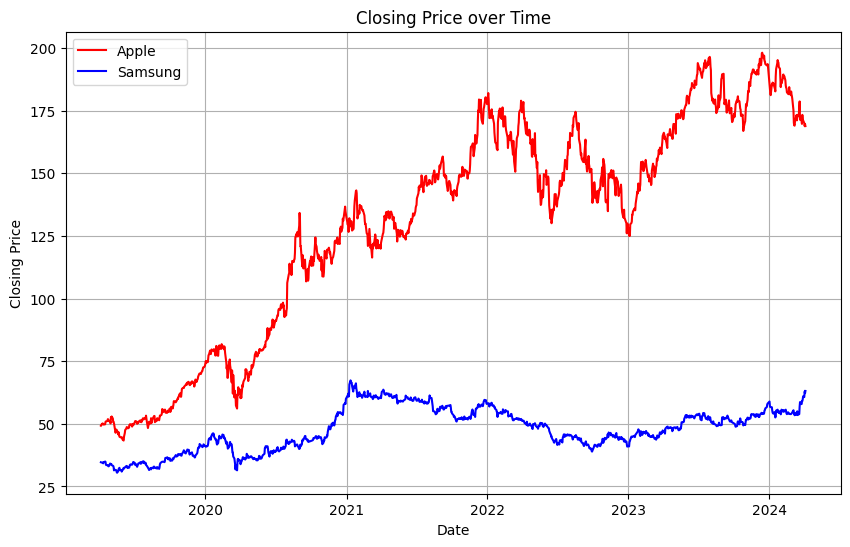

In [23]:
plt.figure(figsize=(10,6))
plt.plot(aapl.index, aapl['Close'], color='red', label='Apple')
plt.plot(samsung.index, samsung['Close'], color='blue', label='Samsung')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price over Time')
plt.legend()
plt.grid()
plt.show()

In [24]:
# Grabbing data for 2023-2024 only

aapl_dates_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]
aapl_close_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]['Close']

samsung_dates_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung.index.year == 2024)]
samsung_close_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung.index.year == 2024)]['Close']

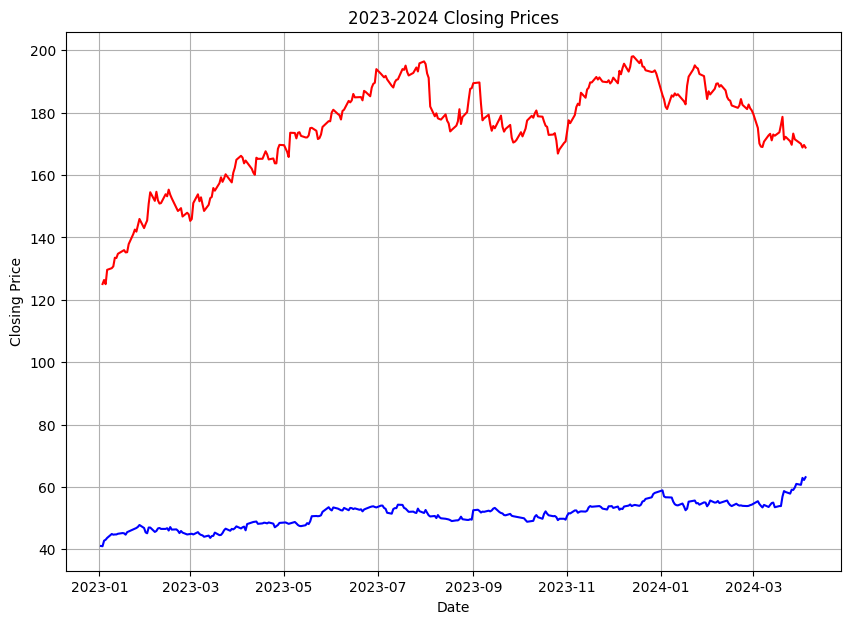

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(aapl_dates_2023_2024.index, aapl_close_2023_2024, color='red')
plt.plot(samsung_dates_2023_2024.index, samsung_close_2023_2024, color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('2023-2024 Closing Prices')
plt.grid()
plt.show()

In [26]:
aapl['MA_50'] = aapl['Close'].rolling(window=50).mean()
aapl['MA_50']

aapl['MA_200'] = aapl['Close'].rolling(window=200).mean()
aapl['MA_200']

Date
2019-04-05          NaN
2019-04-08          NaN
2019-04-09          NaN
2019-04-10          NaN
2019-04-11          NaN
                ...    
2024-03-28    183.52095
2024-04-01    183.45455
2024-04-02    183.37900
2024-04-03    183.29720
2024-04-04    183.21670
Name: MA_200, Length: 1258, dtype: float64

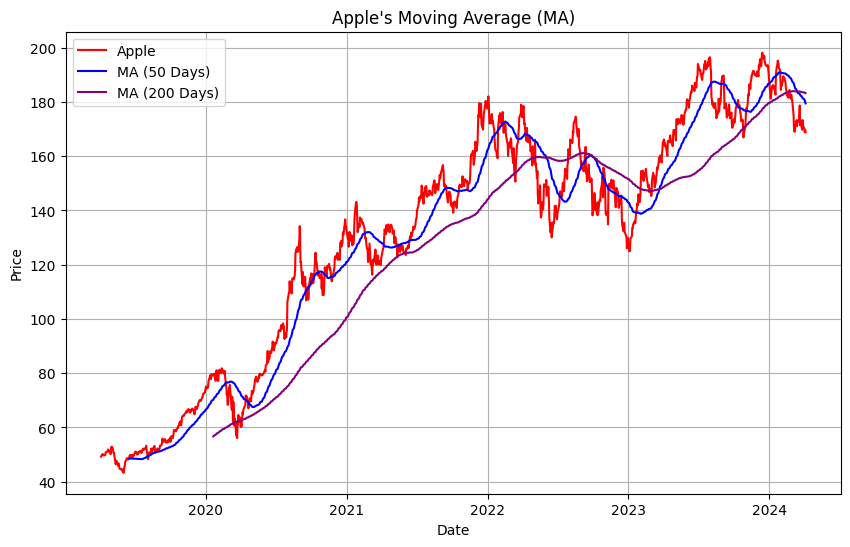

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, aapl['Close'], color='red', label='Apple')
plt.plot(aapl.index, aapl['MA_50'], color='blue', label='MA (50 Days)')
plt.plot(aapl.index, aapl['MA_200'], color='purple', label='MA (200 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple\'s Moving Average (MA)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
samsung['MA_50'] = samsung['Close'].rolling(window=50).mean()
samsung['MA_50']

samsung['MA_200'] = samsung['Close'].rolling(window=200).mean()
samsung['MA_200']

Date
2019-04-05         NaN
2019-04-08         NaN
2019-04-09         NaN
2019-04-10         NaN
2019-04-11         NaN
                ...   
2024-03-29    53.12127
2024-04-01    53.16234
2024-04-02    53.21044
2024-04-03    53.25891
2024-04-04    53.30812
Name: MA_200, Length: 1233, dtype: float64

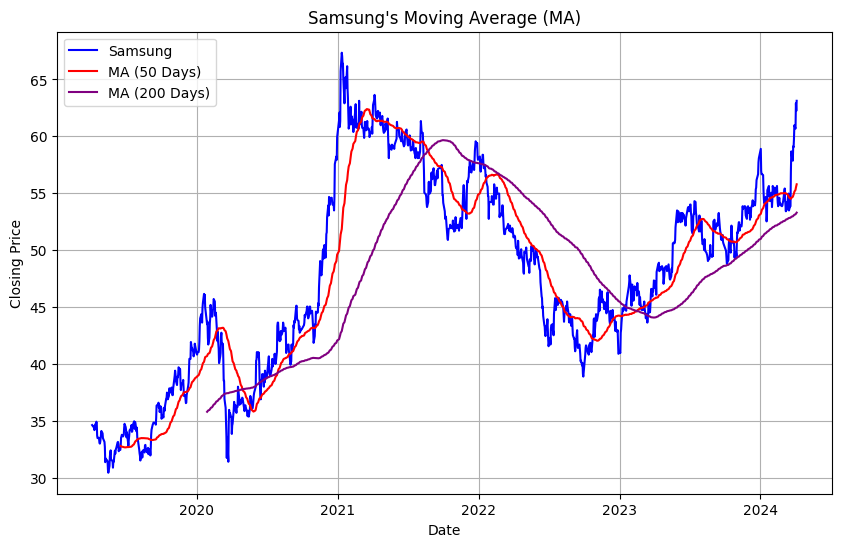

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(samsung.index, samsung['Close'], color='blue', label='Samsung')
plt.plot(samsung.index, samsung['MA_50'], color='red', label='MA (50 Days)')
plt.plot(samsung.index, samsung['MA_200'], color='purple', label='MA (200 Days)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Samsung\'s Moving Average (MA)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
aapl_MA_14_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]['Close'].rolling(window=14).mean()

aapl_MA_30_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]['Close'].rolling(window=30).mean()

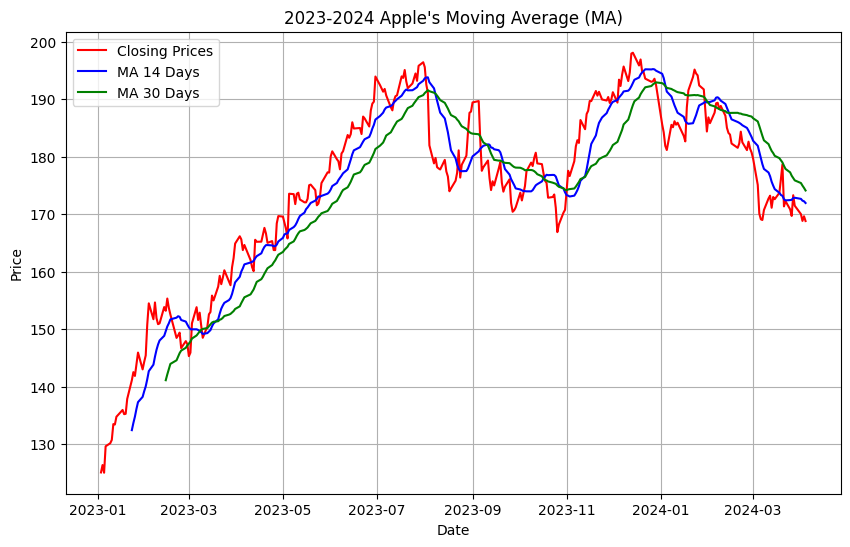

In [31]:
# Plotting 2023-2024 Apple SMA for 14/30/90 Days
plt.figure(figsize=(10, 6))
plt.plot(aapl_dates_2023_2024.index, aapl_close_2023_2024, color='red', label='Closing Prices')
plt.plot(aapl_dates_2023_2024.index, aapl_MA_14_2023_2024, color='blue', label='MA 14 Days')
plt.plot(aapl_dates_2023_2024.index, aapl_MA_30_2023_2024, color='green', label='MA 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2023-2024 Apple\'s Moving Average (MA)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
samsung_MA_14_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung.index.year == 2024)]['Close'].rolling(window=14).mean()

samsung_MA_30_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung.index.year == 2024)]['Close'].rolling(window=30).mean()

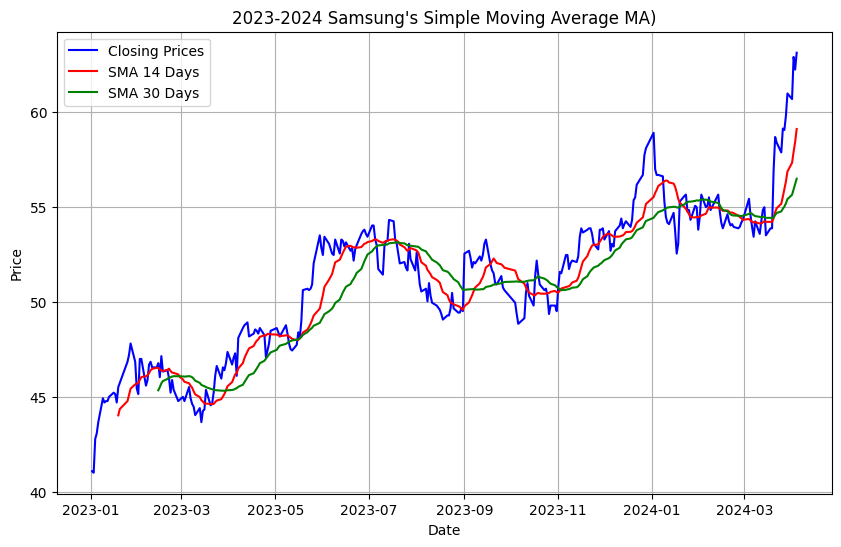

In [33]:
# Plotting 2023-2024 Apple SMA for 14/30/90 Days
plt.figure(figsize=(10, 6))
plt.plot(samsung_dates_2023_2024.index, samsung_close_2023_2024, color='blue', label='Closing Prices')
plt.plot(samsung_dates_2023_2024.index, samsung_MA_14_2023_2024, color='red', label='SMA 14 Days')
plt.plot(samsung_dates_2023_2024.index, samsung_MA_30_2023_2024, color='green', label='SMA 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2023-2024 Samsung\'s Simple Moving Average MA)')
plt.legend()
plt.grid(True)
plt.show()

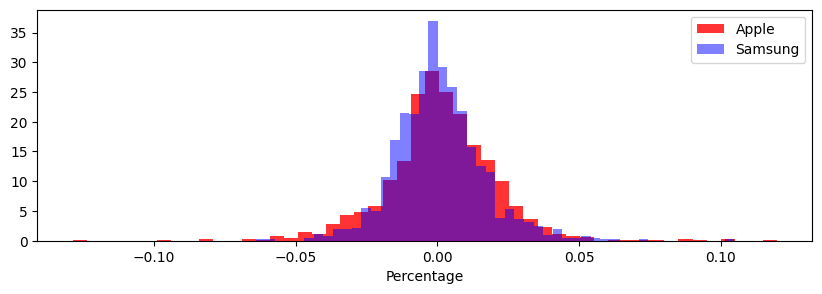

In [46]:
# Calculating Apple's Daily Return
aapl['Return'] = (aapl['Close']/aapl['Close'].shift(1)) - 1
aapl.dropna(subset=['Return'], inplace=True)
aapl['Return']

# Calculating Samsung's Daily Return
samsung['Return'] = (samsung['Close']/samsung['Close'].shift(1)) - 1
samsung.dropna(subset=['Return'], inplace=True)
samsung['Return']

# Plot Apple's Return
plt.figure(figsize=(10, 3))
plt.hist(aapl['Return'], bins=50, color='red', alpha=0.8, density=True, label='Apple')
# Plot Samsung's Return
plt.hist(samsung['Return'], bins=50, color='blue', alpha=0.5, density=True, label='Samsung')
plt.legend()
plt.xlabel('Percentage')
plt.show()

Volatility Daily Return

In [37]:
aapl['Volatility'] = aapl['Return'].rolling(window=252).std() * (252**.5)

aapl['Volatility']

samsung['Volatility'] = samsung['Return'].rolling(window=252).std() * (252**.5)

samsung['Volatility']

Date
2019-04-08         NaN
2019-04-09         NaN
2019-04-10         NaN
2019-04-11         NaN
2019-04-12         NaN
                ...   
2024-03-29    0.214105
2024-04-01    0.213857
2024-04-02    0.215981
2024-04-03    0.216078
2024-04-04    0.215905
Name: Volatility, Length: 1232, dtype: float64

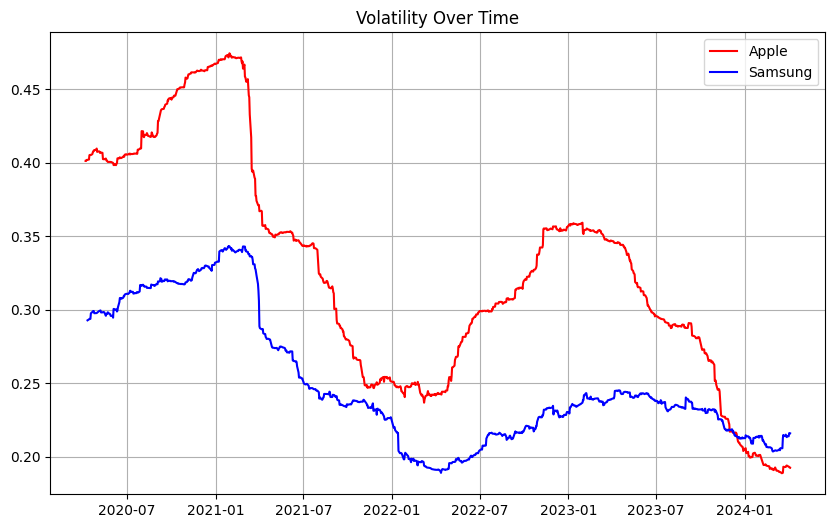

In [38]:
# Plotting volatility using line plot
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, aapl['Volatility'], color='red', label='Apple')
plt.plot(samsung.index, samsung['Volatility'], color='blue', label='Samsung')
plt.title('Volatility Over Time')
plt.legend()
plt.grid(True)
plt.show()


Finding Correlations for Apple & Samsung

In [39]:
aapl_corr = aapl.corr()
aapl_corr

samsung_corr = samsung.corr()
samsung_corr

,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200,Return,RSI,Volatility
Open,1.000000,0.998625,0.999092,0.997547,0.986120,0.163006,0.939821,0.612786,-0.012210,0.054131,-0.006666
High,0.998625,1.000000,0.998535,0.998935,0.986525,0.186469,0.936581,0.602514,0.015077,0.061715,0.006613
Low,0.999092,0.998535,1.000000,0.998829,0.987619,0.150562,0.940816,0.617715,0.006991,0.057131,-0.012390
Close,0.997547,0.998935,0.998829,1.000000,0.988118,0.168624,0.937211,0.608827,0.039163,0.068393,-0.003453
Adj Close,0.986120,0.986525,0.987619,0.988118,1.000000,0.129589,0.937396,0.650311,0.033409,0.048436,-0.148503
Volume,0.163006,0.186469,0.150562,0.168624,0.129589,1.000000,0.101643,-0.250160,0.072763,0.023776,0.412949
MA_50,0.939821,0.936581,0.940816,0.937211,0.937396,0.101643,1.000000,0.764637,-0.052478,-0.220404,-0.191003
MA_200,0.612786,0.602514,0.617715,0.608827,0.650311,-0.250160,0.764637,1.000000,-0.043160,-0.221807,-0.654356
Return,-0.012210,0.015077,0.006991,0.039163,0.033409,0.072763,-0.052478,-0.043160,1.000000,0.258257,0.070126
RSI,0.054131,0.061715,0.057131,0.068393,0.048436,0.023776,-0.220404,-0.221807,0.258257,1.000000,0.267165


<Axes: >

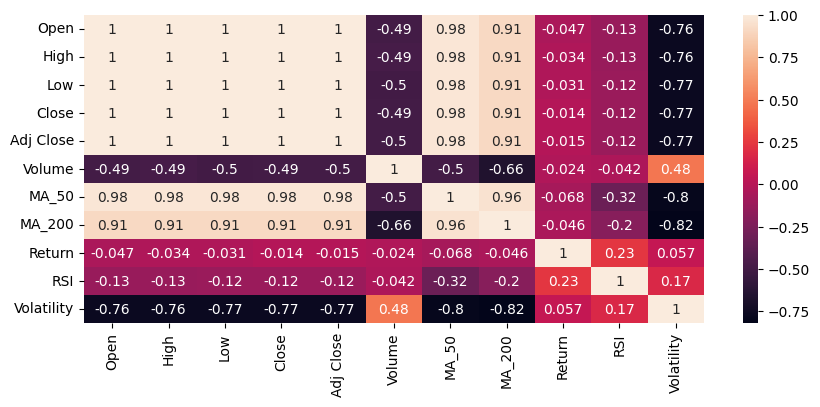

In [40]:
plt.figure(figsize=(10,4))
sns.heatmap(aapl_corr, annot=True)

<Axes: >

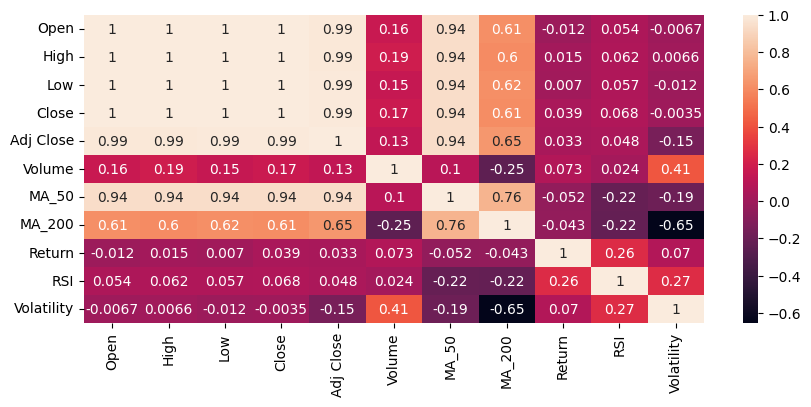

In [41]:
plt.figure(figsize=(10,4))
sns.heatmap(samsung_corr, annot=True)